In [1]:
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as specgram
import keras
from keras.models import load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
training_file = './dataset/train_batch_0'
testing_file = './dataset/test_batch_0'

In [3]:
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [4]:
#X_train, y_train = train['data'], train['labels']
#X_test, y_test = test['data'], test['labels']
from keras.utils import np_utils

X_train = np.array(train['data'])
y_train = np.array(train['labels'])
X_test = np.array(test['data'])
y_test = np.array(test['labels'])

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
input_shape = (48, 48, 1)

#x_train =np.expand_dims(x_train, axis=0)
#x_test= np.expand_dims(x_test, axis=0)

In [5]:
print("Number of training examples =", X_train.shape[0])
print("Number of testing examples =", X_test.shape[0])
print("Image data shape =", X_train[0].shape)
print("Number of classes =", len(np.unique(y_train)))

Number of training examples = 7200
Number of testing examples = 7200
Image data shape = (48, 48, 1)
Number of classes = 6


In [108]:
model = Sequential()

model.add(Conv2D(64, (3,3), padding='same',
                 input_shape=(48, 48, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2)))

model.add(Conv2D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2)))

model.add(Dropout(0.1))

model.add(Conv2D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(6)) 
model.add(Activation('softmax'))
adam = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
activation_5 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 128)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 128)       0         
__________

In [110]:
#adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-06, decay=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [4]:
#x_train = np.random.random((7200, 2304))
#y_train = keras.utils.to_categorical(np.random.randint(6, size=(7200, 1)), num_classes=6)
#x_test = np.random.random((7200, 2304))
#y_test = keras.utils.to_categorical(np.random.randint(6, size=(7200, 1)), num_classes=6)

In [111]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=6)

In [112]:
#np.resize(img, (-1, <image shape>)
#cnnhistory=model.fit(X_train, y_train, batch_size=None, epochs=1, verbose=1, callbacks=None, 
                     #validation_split=0.0, validation_data=(X_test, y_test), shuffle=True) 
                     #sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
cnnhistory=model.fit(X_train, y_train, batch_size=100, epochs=25, validation_split=0.2)

Train on 5760 samples, validate on 1440 samples
Epoch 1/25
5760/5760 [==============================] - 213s 37ms/step - loss: 6.6485 - acc: 0.2262 - val_loss: 1.8683 - val_acc: 0.4174
Epoch 2/25
5760/5760 [==============================] - 206s 36ms/step - loss: 3.5908 - acc: 0.2844 - val_loss: 1.2891 - val_acc: 0.5333
Epoch 3/25
5760/5760 [==============================] - 205s 36ms/step - loss: 2.1582 - acc: 0.3387 - val_loss: 1.3369 - val_acc: 0.5229
Epoch 4/25
5760/5760 [==============================] - 204s 35ms/step - loss: 1.6841 - acc: 0.3727 - val_loss: 1.3645 - val_acc: 0.5458
Epoch 5/25
5760/5760 [==============================] - 205s 36ms/step - loss: 1.5582 - acc: 0.4007 - val_loss: 1.3476 - val_acc: 0.5681
Epoch 6/25
5760/5760 [==============================] - 205s 36ms/step - loss: 1.4803 - acc: 0.4189 - val_loss: 1.2806 - val_acc: 0.6125
Epoch 7/25
5760/5760 [==============================] - 205s 36ms/step - loss: 1.3986 - acc: 0.4510 - val_loss: 1.1793 - val_acc: 

In [12]:
#cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=1200, validation_data=(x_testcnn, y_test), shuffle=True)

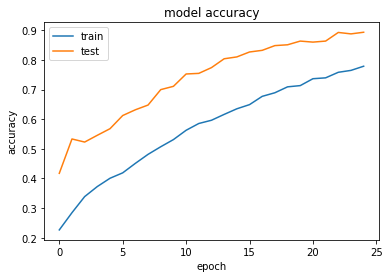

In [114]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

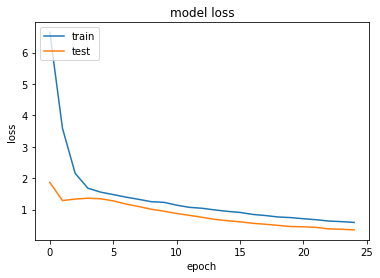

In [115]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [116]:
import os

model_name = 'Model20.h5'
save_dir = os.path.join(os.getcwd(), 'model_checkpoints')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
del model
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\Myderson\Anaconda3\Anaconda3_Worspace\reconnaissance_emotion_faciale\model_checkpoints\Model20.h5 


In [117]:
model=load_model('./model_checkpoints/Model20.h5') 
loss, acc=model.evaluate(X_test, y_test)

print("loss:", loss) 
print("accuracy", acc)

7200/7200 [==============================] - 77s 11ms/step
loss: 0.366870973176
accuracy 0.894722222222


In [124]:
print(model.predict(X_test[0:7199]), (y_test[0:7199]))

[[  1.87180601e-02   6.89390779e-01   1.28740266e-01   1.18154518e-01
    8.39599129e-03   3.66003402e-02]
 [  9.91771162e-01   2.45133974e-03   8.59354681e-04   2.93343840e-03
    9.63341619e-04   1.02125609e-03]
 [  9.99998927e-01   3.40128622e-07   1.00268068e-07   6.14807675e-07
    1.45486112e-09   1.43688137e-08]
 ..., 
 [  9.91334617e-01   8.38124193e-03   1.16652343e-04   1.23100661e-04
    1.56035719e-06   4.27265186e-05]
 [  1.44529296e-03   8.28545913e-03   4.96584587e-02   8.25864196e-01
    9.80323255e-02   1.67142618e-02]
 [  8.20171495e-04   9.95261490e-01   2.26319506e-04   1.48107577e-03
    2.54188035e-05   2.18554959e-03]] [2 0 0 ..., 0 3 1]


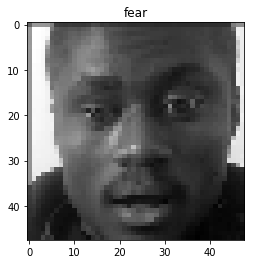

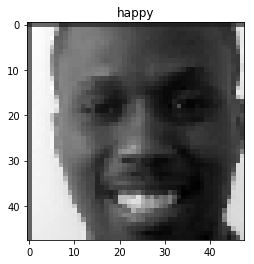

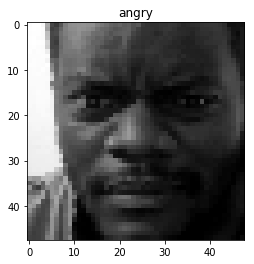

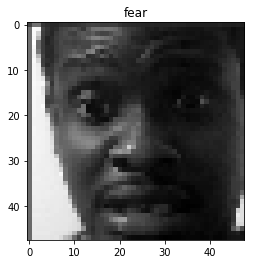

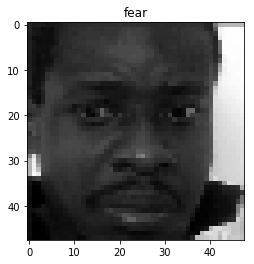

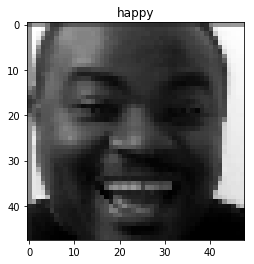

In [119]:
targets_names = ["happy", "disgust", "sad", "surprise", "fear", 
                 "angry"
]
# Plot one image
plt.imshow(X_test[4999].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[4999]])

plt.show()

# Plot one image
plt.imshow(X_test[6999].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[6999]])

plt.show()

# Plot one image
plt.imshow(X_test[2309].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[2309]])

plt.show()

# Plot one image
plt.imshow(X_test[5309].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[5309]])

plt.show()

# Plot one image
plt.imshow(X_test[4569].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[4569]])

plt.show()

# Plot one image
plt.imshow(X_test[6590].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[6590]])

plt.show()


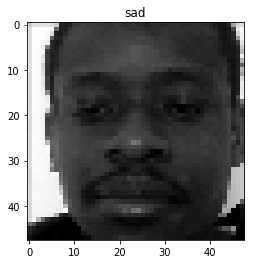

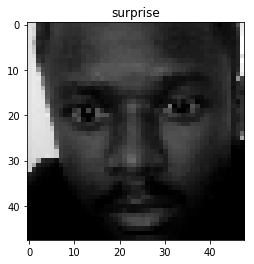

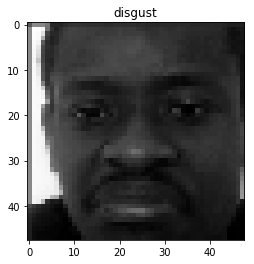

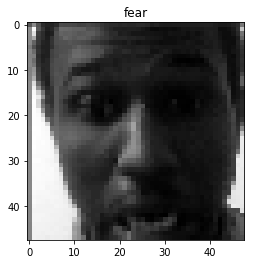

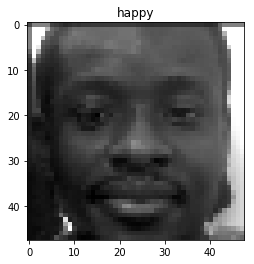

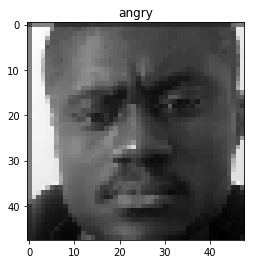

In [120]:
# Plot one image
plt.imshow(X_test[0].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[0]])

plt.show()

# Plot one image
plt.imshow(X_test[600].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[600]])

plt.show()

# Plot one image
plt.imshow(X_test[787].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[787]])

plt.show()

# Plot one image
plt.imshow(X_test[921].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[921]])

plt.show()

# Plot one image
plt.imshow(X_test[15].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[15]])

plt.show()

# Plot one image
plt.imshow(X_test[11].reshape(48, 48), cmap="gray")
#plt.title(targets_names[y_test[]])
plt.title(targets_names[y_test[11]])

plt.show()

In [140]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_test)
print('\n','cm=','\n',cm)


 cm= 
 [[202 217 218 209 181 203]
 [186 183 204 214 205 211]
 [204 192 201 214 196 189]
 [174 202 175 199 211 195]
 [199 212 206 196 186 240]
 [205 191 200 212 182 186]]
